# Year 11 IGCSE Results Analysis for June 2024

In [1]:
import pandas as pd

# Change any duplicated grades to single grades
def convert_duplicated_grades(grade):
    if pd.isna(grade):
        return grade  # Leave NaN values as is
    if grade == 'A*A*':
        return 'A*'
    if grade == 'AA':
        return 'A'
    elif grade == 'BB':
        return 'B'
    elif grade == 'CC':
        return 'C'
    elif grade == 'DD':
        return 'D'
    elif grade == 'EE':
        return 'E'
    elif grade == 'FF':
        return 'F'
    elif grade == 'GG':
        return 'G'
    elif grade == 'XX' or grade == 'X':
        return ''
    else:
        return grade
    
# Load CSV file with the igcse results
igcse_results_path = 'input_files/igcse_2024_analysis.csv'
igcse_results = pd.read_csv(igcse_results_path)

# Covert all duplicated grades to single grades
for col in igcse_results.columns:
    igcse_results[col] = igcse_results[col].apply(convert_duplicated_grades)

# Save the cleaned data to a new CSV file
igcse_results.to_csv('output_files/igcse_2024_cleaned.csv', index=False)
# print(igcse_results)
print('The cleaned data has been saved to output_files/igcse_2024_cleaned.csv')

# Load the cleaned data
igcse_results = pd.read_csv('output_files/igcse_2024_cleaned.csv')
# Melt the data to have a long format where each grade is a separate row
grades_melted = igcse_results.melt(var_name='Subject', value_name='Grade')

# Remove NaN values
grades_melted = grades_melted.dropna()

# Define the pass and fail grades
pass_grades = ['A*', 'A', 'B', 'C']
fail_grades = ['D', 'E', 'F', 'G', 'U']

# Add a new column indicating whether each grade is a pass or fail
grades_melted['Pass_Fail'] = grades_melted['Grade'].apply(
    lambda grade: 'Pass' if grade in pass_grades else 'Fail'
)

# Group by subject and calculate the total number of grades, passes, and fails
subject_pass_fail = grades_melted.groupby('Subject')['Pass_Fail'].value_counts().unstack().fillna(0)
subject_pass_fail['Total Grades'] = subject_pass_fail.sum(axis=1)

# If you want to rename the columns to 'Passes' and 'Fails'
subject_pass_fail.rename(columns={'Pass': 'Passes', 'Fail': 'Fails'}, inplace=True)

print(subject_pass_fail)

# Calculate the percentage for passes and fails
subject_pass_fail['Pass Percentage'] = ((subject_pass_fail['Passes'] / subject_pass_fail['Total Grades']) * 100).round(3)
subject_pass_fail['Fail Percentage'] = ((subject_pass_fail['Fails'] / subject_pass_fail['Total Grades']) * 100).round(3)

# Sort the table by Fail Percentage in descending order
subject_pass_fail_sorted = subject_pass_fail.sort_values(by='Fail Percentage', ascending=False)

# Save the sorted table to a CSV file
subject_pass_fail_sorted.to_csv('output_files/igcse_2024_pass_fail_analysis.csv')

The cleaned data has been saved to output_files/igcse_2024_cleaned.csv
Pass_Fail             Fails  Passes  Total Grades
Subject                                          
Additional Maths        0.0     2.0           2.0
Arabic                  0.0     1.0           1.0
Art and Design          8.0    12.0          20.0
Business Studies        9.0    40.0          49.0
Co-ord Science          7.0    44.0          51.0
Combined Science        7.0     1.0           8.0
Computer Science        5.0    31.0          36.0
English 1st Lang        4.0    50.0          54.0
English 2nd Lang        5.0     0.0           5.0
English Literature      3.0    45.0          48.0
French                  0.0    36.0          36.0
Geography              10.0     9.0          19.0
History                 1.0    12.0          13.0
Maths                   8.0    49.0          57.0
Spanish 1st Lang        3.0    49.0          52.0
Spanish Foreign Lang    0.0     4.0           4.0


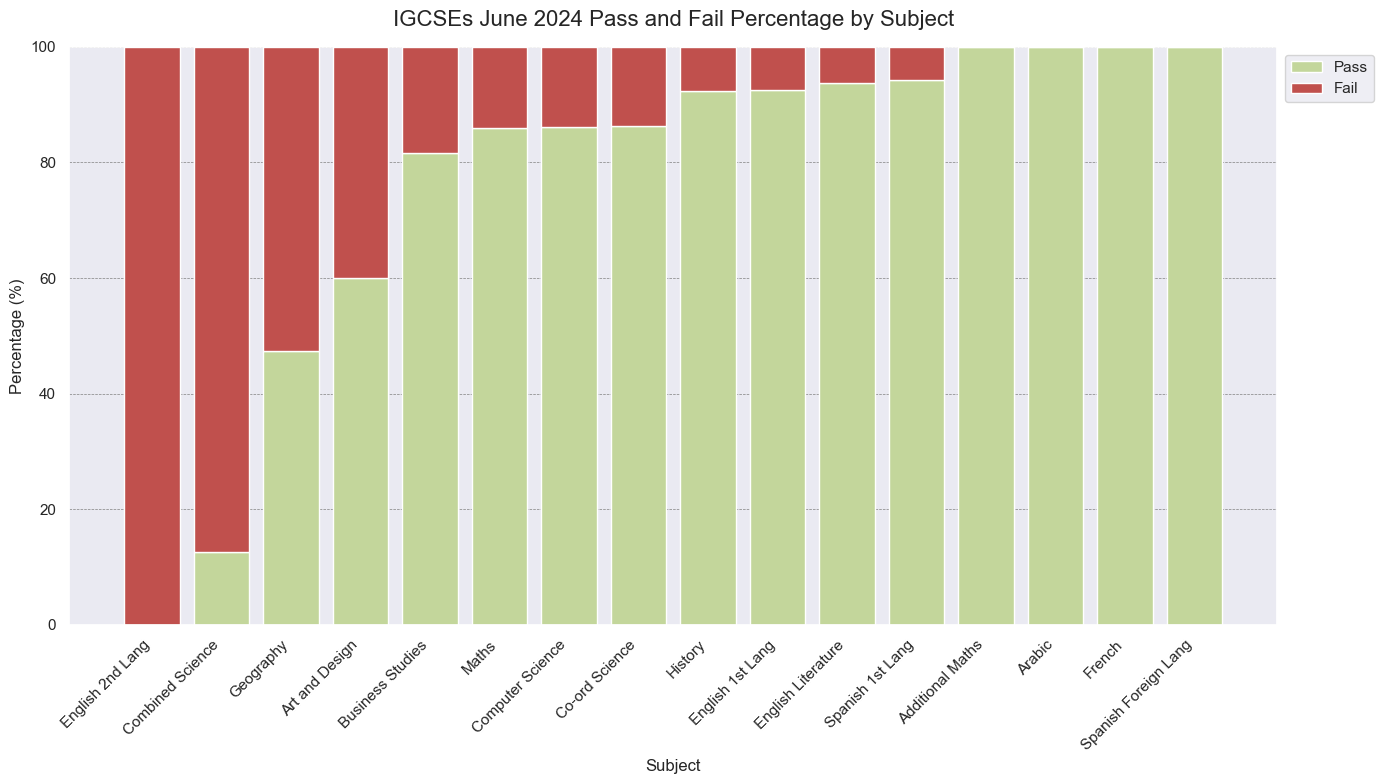

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the CSV file
file_path = 'output_files/igcse_2024_pass_fail_analysis.csv'
data = pd.read_csv(file_path)

# Sorting the data by Fail Percentage
data_sorted_by_fails = data.sort_values('Fail Percentage', ascending=False)

# Plotting the stacked bar chart using matplotlib with seaborn aesthetics
plt.figure(figsize=(14, 8))
sns.set(style="darkgrid")

# Creating the first bar (for Pass Percentage)
plt.bar(data_sorted_by_fails['Subject'], data_sorted_by_fails['Pass Percentage'], label='Pass', color='#C3D69B')

# Creating the second bar (for Fail Percentage), stacked on top of the Pass Percentage
plt.bar(data_sorted_by_fails['Subject'], data_sorted_by_fails['Fail Percentage'], 
        bottom=data_sorted_by_fails['Pass Percentage'], label='Fail', color='#C0504D')

# Adding labels and title
plt.xlabel('Subject')
plt.ylabel('Percentage (%)')
plt.title('IGCSEs June 2024 Pass and Fail Percentage by Subject', pad=15, fontsize=16)
plt.xticks(rotation=45, ha='right')

# Set dark grid style
plt.grid(color='gray', linestyle='--', linewidth=0.5)

# Add a legend outside the plot
plt.legend(bbox_to_anchor=(1, 1))

# Display the chart
plt.tight_layout()
plt.show()

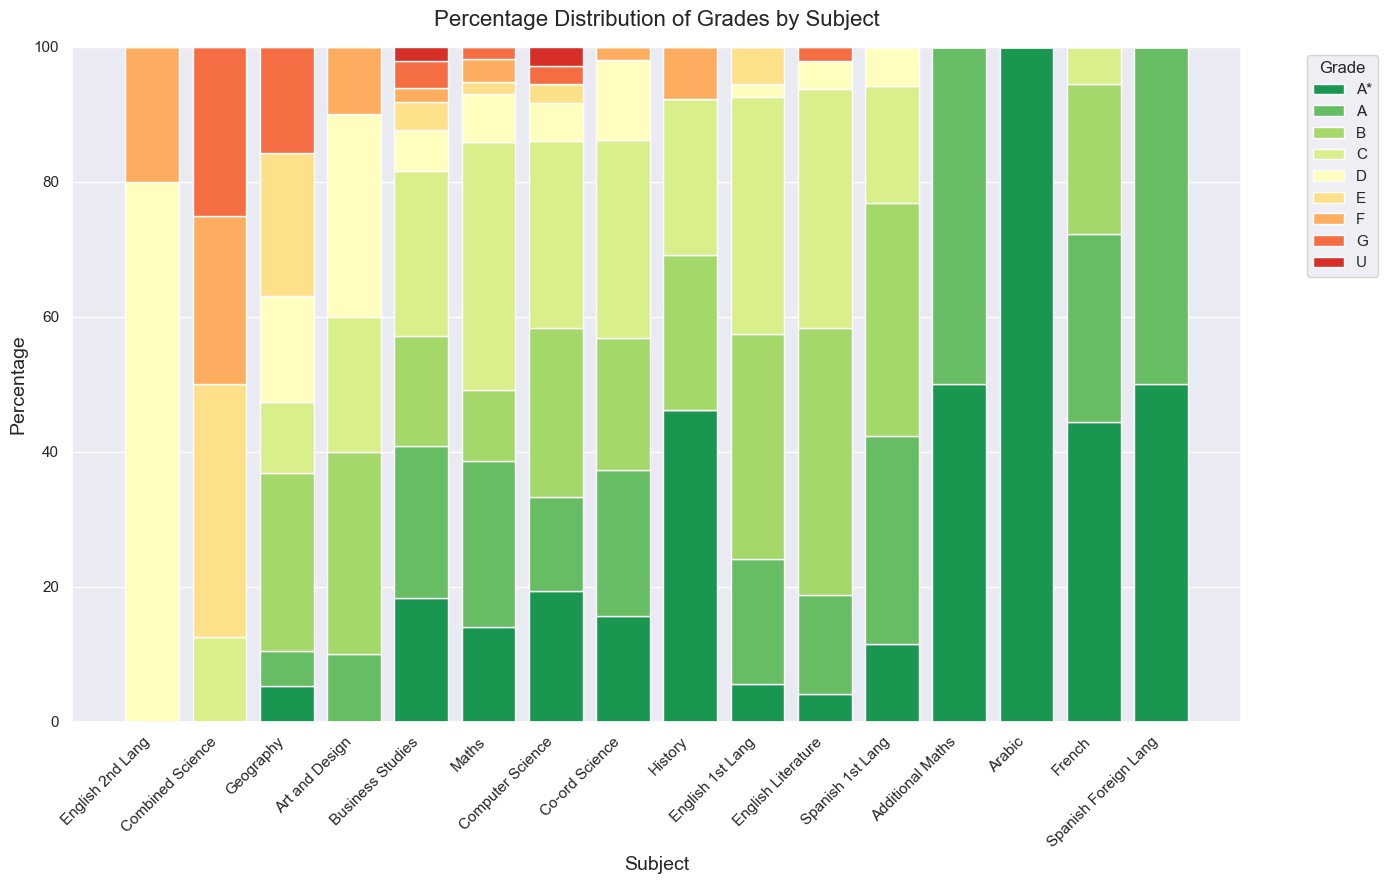

In [3]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

# Load the fail percentage data
fail_data_path = 'output_files/igcse_2024_pass_fail_analysis.csv'
fail_data = pd.read_csv(fail_data_path)

# Sort the subjects by Fail Percentage in descending order
sorted_subjects = fail_data.sort_values('Fail Percentage', ascending=False)['Subject']

# Load the cleaned grade data
file_path = 'output_files/igcse_2024_cleaned.csv'
new_data = pd.read_csv(file_path)

# Transforming the data to a long format
new_long_format_data = new_data.melt(var_name='Subject', value_name='Grade')

# Dropping any NaN values, as they represent missing grades
new_long_format_data = new_long_format_data.dropna()

# Calculating the percentage of each grade within each subject
new_subject_grade_counts = new_long_format_data.groupby(['Subject', 'Grade']).size().unstack().fillna(0)
new_subject_grade_percentages = new_subject_grade_counts.div(new_subject_grade_counts.sum(axis=1), axis=0) * 100

# Reordering the columns to ensure 'A*' comes first
grade_order = ['A*', 'A', 'B', 'C', 'D', 'E', 'F', 'G', 'U']  # Add or remove grades as necessary
new_subject_grade_percentages = new_subject_grade_percentages[grade_order]

# Reordering the index (subjects) based on the sorted fail percentages
new_subject_grade_percentages = new_subject_grade_percentages.loc[sorted_subjects]

# Choosing a less intense color palette
palette = sns.color_palette("RdYlGn_r", len(grade_order)) 

# Plotting with Matplotlib using Seaborn's style
plt.figure(figsize=(14, 9))
bottom_val = None

# Initialize bottom_val as an array of zeros with the same length as the index of your DataFrame
bottom_val = np.zeros(len(new_subject_grade_percentages.index))

# Iterate through each grade level to stack the bars
for grade in new_subject_grade_percentages.columns:
    plt.bar(new_subject_grade_percentages.index, 
            new_subject_grade_percentages[grade], 
            bottom=bottom_val, 
            label=grade, 
            color=palette[grade_order.index(grade)])
    
    # Update bottom_val by adding the current grade level values
    bottom_val += new_subject_grade_percentages[grade].values

# Adding labels, title, and legend
plt.xlabel('Subject', fontsize=14)
plt.ylabel('Percentage', fontsize=14)
plt.title('Percentage Distribution of Grades by Subject', fontsize=16, pad=15)
plt.xticks(rotation=45, ha='right')
plt.legend(title='Grade', bbox_to_anchor=(1.05, 1), loc='upper left')

# Display the stacked bar chart
plt.tight_layout()
plt.show()


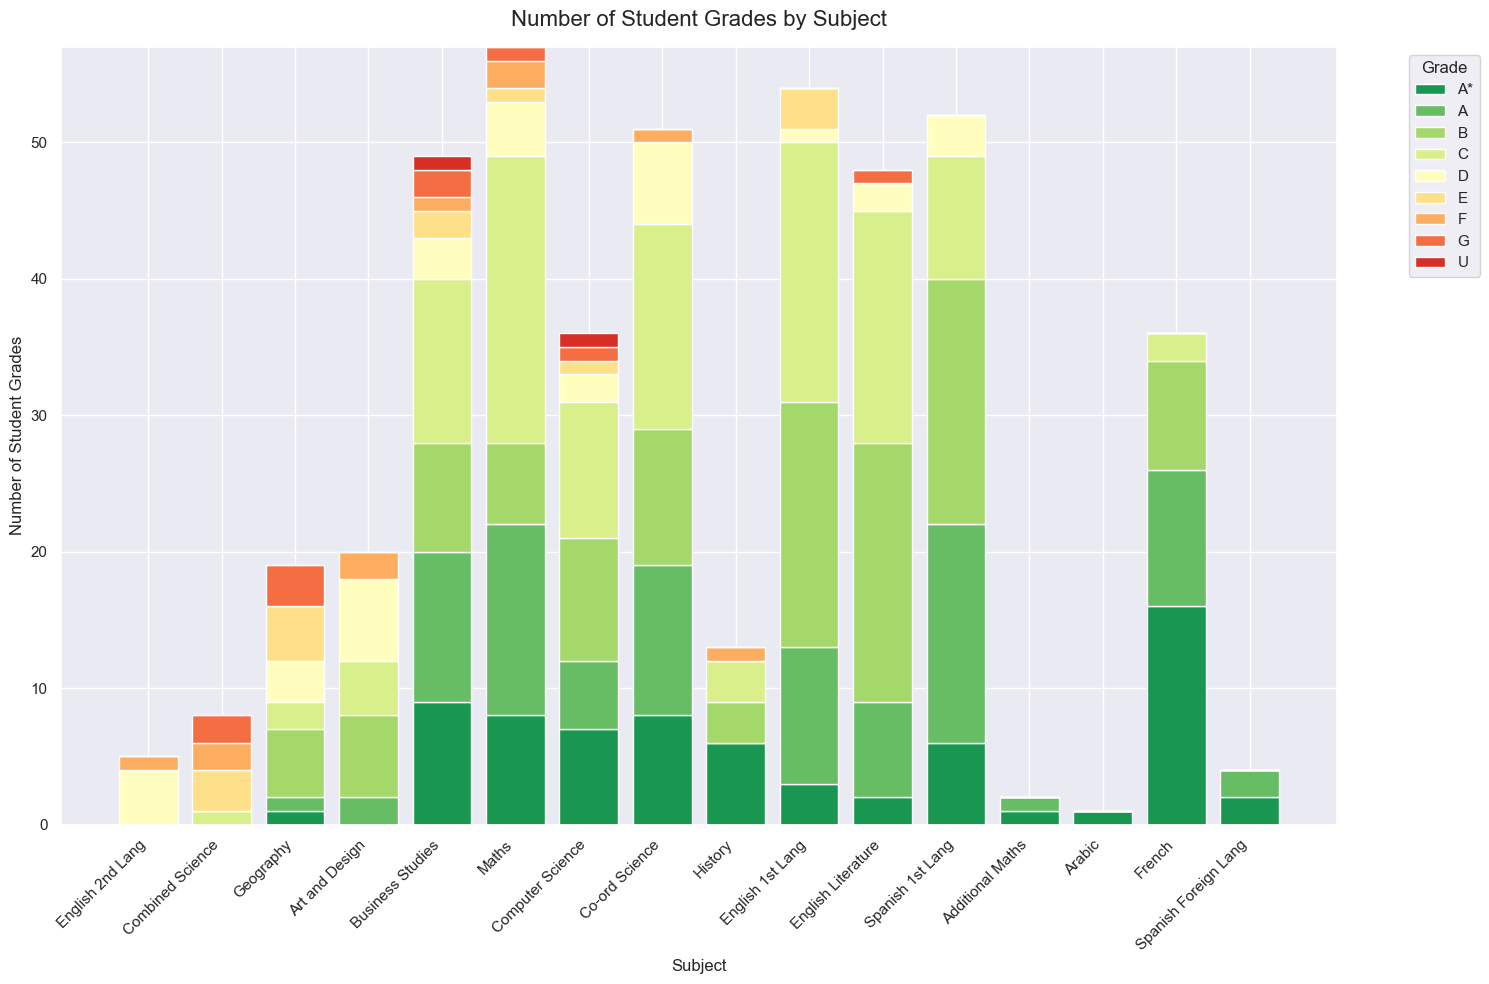

In [4]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

# Load the fail percentage data
fail_data_path = 'output_files/igcse_2024_pass_fail_analysis.csv'
fail_data = pd.read_csv(fail_data_path)

# Sort the subjects by Fail Percentage in descending order
sorted_subjects = fail_data.sort_values('Fail Percentage', ascending=False)['Subject']

# Load the CSV file
file_path = 'output_files/igcse_2024_cleaned.csv'
new_data = pd.read_csv(file_path)

# Transforming the data to a long format
new_long_format_data = new_data.melt(var_name='Subject', value_name='Grade')

# Dropping any NaN values, as they represent missing grades
new_long_format_data = new_long_format_data.dropna()

# Calculating the count of each grade within each subject
new_subject_grade_counts = new_long_format_data.groupby(['Subject', 'Grade']).size().unstack().fillna(0)

# Reordering the columns to ensure 'A*' comes first, and ignoring 'X' grades
grade_order = ['A*', 'A', 'B', 'C', 'D', 'E', 'F', 'G', 'U']  # Exclude 'X' from this list
new_subject_grade_counts = new_subject_grade_counts[grade_order]

# Reordering the index (subjects) based on the sorted fail percentages
new_subject_grade_counts = new_subject_grade_counts.loc[sorted_subjects]

# Choosing a green to red color palette by reversing 'RdYlGn'
palette = sns.color_palette("RdYlGn_r", len(grade_order))  # Green to red gradient

# Plotting with the new color palette
plt.figure(figsize=(15, 10))

# Initialize bottom_val as an array of zeros with the same length as the index of your DataFrame
bottom_val = np.zeros(len(new_subject_grade_counts.index))

# Iterate through each grade level to stack the bars
for grade in new_subject_grade_counts.columns:
    plt.bar(new_subject_grade_counts.index, 
            new_subject_grade_counts[grade], 
            bottom=bottom_val, 
            label=grade, 
            color=palette[grade_order.index(grade)])
    
    # Update bottom_val by adding the current grade level values
    bottom_val += new_subject_grade_counts[grade].values

plt.xlabel('Subject')
plt.ylabel('Number of Student Grades')
plt.title('Number of Student Grades by Subject', fontsize=16, pad=15)
plt.xticks(rotation=45, ha='right')
plt.legend(title='Grade', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.show()